### EDA on a Dataset and Linear Regression results

In [9]:
# Dataset: 
headbrain11.csv

In [10]:
import pandas as pd
df = pd.read_csv("headbrain11.csv")
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Head Size(cm^3)      237 non-null    int64
 1   Brain Weight(grams)  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


In [12]:
# describe() function gives details about each column's statistical parameters
# - min, max, 1st quartile (25%), 2nd quartile (50%)(median), 3rd quartile (75%)
# - count (total rows)
# - mean (average)
# - Standard Deviation (amount of distance from the mean, based on each value in that column)

df.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [13]:
# Renaming the columns to have simple names

df.columns = ["Head_size","Brain_weight"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Head_size     237 non-null    int64
 1   Brain_weight  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


#### Creating a Linear Regression model

In [14]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Head_size ~ Brain_weight', data=df).fit()

predicted_head_size_series = model.predict(df["Brain_weight"])

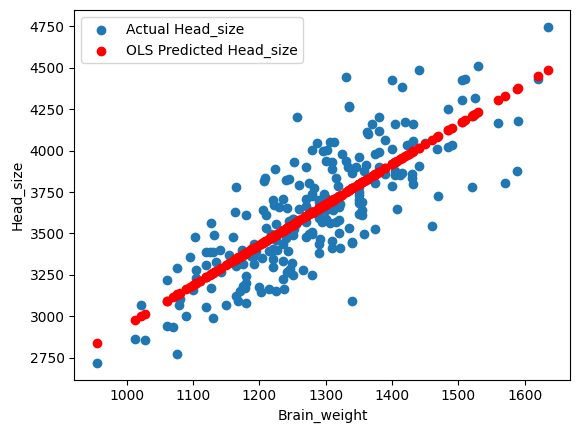

In [15]:
#Actual Vs OLS Predicted plot


import matplotlib.pyplot as plt

# Brain_weight --> shown in x-axis of the plot
# Head_size --> shown in y-axis of the plot

# Actual Head_size based plot
plt.scatter(df["Brain_weight"], df["Head_size"], label="Actual Head_size")

# OLS Predicted Head_size based plot
plt.scatter(df["Brain_weight"], predicted_head_size_series, color="red", label="OLS Predicted Head_size")

plt.xlabel("Brain_weight")
plt.ylabel("Head_size")

plt.legend()

#### Predicting the **Head_size** for a NEW **Brain_weight** of 3000

In [16]:
model.predict(pd.Series(3000, name="Brain_weight"))

0    7801.253837
dtype: float64

In [17]:
model.predict(pd.Series(3000, name="Brain_weight"))

0    7801.253837
dtype: float64

#### Analysis of the HeadBrain dataset

In [18]:
df.describe()

,Head_size,Brain_weight
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


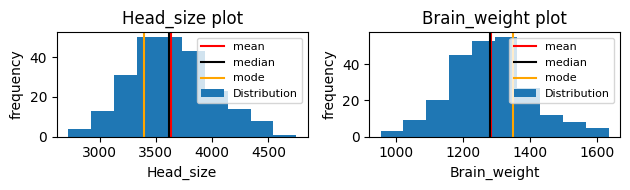

In [19]:
fig, axes = plt.subplots(1,2)
fig.set_figheight(2)

axes[0].set_title("Head_size plot")
axes[0].hist(df["Head_size"])
axes[0].axvline(df["Head_size"].mean(), color="red")
axes[0].axvline(df["Head_size"].median(), color="black")
axes[0].axvline(df["Head_size"].mode()[0], color="orange")
axes[0].set_xlabel("Head_size")
axes[0].set_ylabel("frequency")
axes[0].legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")


axes[1].set_title("Brain_weight plot")
axes[1].hist(df["Brain_weight"])
axes[1].axvline(df["Brain_weight"].mean(), color="red")
axes[1].axvline(df["Brain_weight"].median(), color="black")
axes[1].axvline(df["Brain_weight"].mode()[0], color="orange")
axes[1].set_xlabel("Brain_weight")
axes[1].set_ylabel("frequency")
axes[1].legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")

fig.set_tight_layout(True)

In [20]:
from copy import deepcopy

new_df = deepcopy(df)
new_df.describe()

,Head_size,Brain_weight
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [21]:
# Affecting the original HeadBrain dataset with some NEW and EXTREME VALUES
# This is done to see the Distribution plot of the Series before and after getting affected

import numpy as np
random_series = pd.Series(np.random.randint(1,15000,100))

temp_df = pd.concat([random_series, random_series], axis=1)
temp_df.columns = list(new_df.columns)

affected_df = pd.concat([new_df, temp_df])
affected_df = affected_df.reset_index(drop=True)

affected_df

,Head_size,Brain_weight
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
332,12894,12894
333,9316,9316
334,2412,2412
335,4219,4219


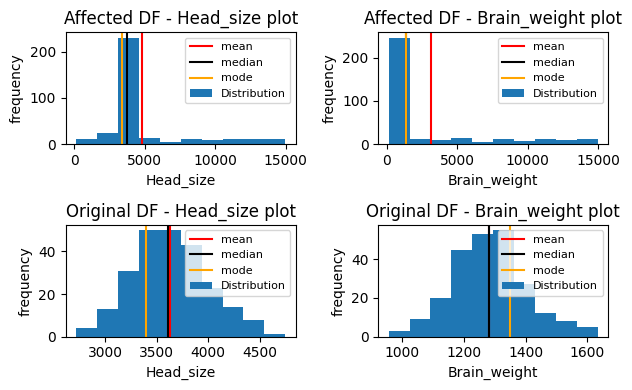

In [22]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(4)


axes[0][0].set_title("Affected DF - Head_size plot")
axes[0][0].hist(affected_df["Head_size"])
axes[0][0].axvline(affected_df["Head_size"].mean(), color="red")
axes[0][0].axvline(affected_df["Head_size"].median(), color="black")
axes[0][0].axvline(affected_df["Head_size"].mode()[0], color="orange")
axes[0][0].set_xlabel("Head_size")
axes[0][0].set_ylabel("frequency")
axes[0][0].legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")


axes[0][1].set_title("Affected DF - Brain_weight plot")
axes[0][1].hist(affected_df["Brain_weight"])
axes[0][1].axvline(affected_df["Brain_weight"].mean(), color="red")
axes[0][1].axvline(affected_df["Brain_weight"].median(), color="black")
axes[0][1].axvline(affected_df["Brain_weight"].mode()[0], color="orange")
axes[0][1].set_xlabel("Brain_weight")
axes[0][1].set_ylabel("frequency")
axes[0][1].legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")


axes[1][0].set_title("Original DF - Head_size plot")
axes[1][0].hist(df["Head_size"])
axes[1][0].axvline(df["Head_size"].mean(), color="red")
axes[1][0].axvline(df["Head_size"].median(), color="black")
axes[1][0].axvline(df["Head_size"].mode()[0], color="orange")
axes[1][0].set_xlabel("Head_size")
axes[1][0].set_ylabel("frequency")
axes[1][0].legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")


axes[1][1].set_title("Original DF - Brain_weight plot")
axes[1][1].hist(df["Brain_weight"])
axes[1][1].axvline(df["Brain_weight"].mean(), color="red")
axes[1][1].axvline(df["Brain_weight"].median(), color="black")
axes[1][1].axvline(df["Brain_weight"].mode()[0], color="orange")
axes[1][1].set_xlabel("Brain_weight")
axes[1][1].set_ylabel("frequency")
axes[1][1].legend(["mean", "median", "mode", "Distribution"], loc ="upper right", fontsize="8")


fig.set_tight_layout(True)

**From above plots, following points can be summarized:**
- The Original DF had good data values with **Normal Distribution**
- But as **we Affected those data values** by manually adding some EXTREME values, **it became non-Normal Distribution**